### Import Quasar catalog for DR14

In [21]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

DATA_URL="https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/"
file="DR14Q_v4_4.fits"
local_dir="/home/colgoat/Jupyter/"
local_file = os.path.join(local_dir,file)
    
catalog=Table.read(local_file)
#catalog.colnames
len(catalog)


526356

### Filtering the data from FITS (name code,redshift, RA&DEC,MJD,BAL index) and sorting by plate

In [24]:
w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC'])\
 & (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0) \
 & ( (catalog['THING_ID']==207816820) | (catalog['THING_ID']==377924340) | (catalog['THING_ID']==225650603) 
 | (catalog['THING_ID']==392778186) | (catalog['THING_ID']==355050230) | (catalog['THING_ID']==336462818)  
 | (catalog['THING_ID']==299427309) | (catalog['THING_ID']==149703743) | (catalog['THING_ID']==432663422) 
 | (catalog['THING_ID']==251588367) )

reduced_cat=catalog[w]
reduced_cat
#cat_by_plate=reduced_cat.group_by('PLATE')
#small_cat=cat_by_plate[0:526356]
#small_cat
reduced_cat

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000043.13+104623.6,0.17973486041364595,10.773231908866133,207816820,6182,56190,718,BOSS,3.005,0.0,VI,3.005000114440918,2.995504140853882,0.0006966799846850336,0,3.0169102999999997,-1.0,-1.0,3298535424000,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.69926917552948 .. 6.339705467224121,37.4472541809082 .. 2.379213809967041,22.847274780273438 .. 20.480327606201172,0.23554739356040955 .. 0.10812235623598099,-26.450527,0.29111263155937195 .. 0.08673632144927979,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,-0.17561469972133634,7.2417462281258835,0.051094744354486465,38.157109483219976,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,17.267,0.151,7.199999809265137,0.909,17.156,--,0.30000001192092896,0.9531,11.834,--,1.600000023841858,0.8321,8.558,0.151,3.0999999046325684,0.945,0000,BUUB,0.568887,1.0,2.0823967060410074e-31,2.866109134084514e-32,1.9651517239956425e-31,4.191943334905218e-32,2.7520297583259128e-31,4.162475160898041e-32,2.255682675965216e-31,5.913823916910617e-32,0,-1.0,-1.0,-1.0
005416.26+281024.3,13.56776467504153,28.173443170781212,355050230,6253,56574,924,BOSS,2.3890000000000002,0.0,VI,2.388999938964844,2.389201641082764,0.00031180441146716475,0,2.3840357999999995,2.389455,2.389455,2199023255552,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.5042932033538818 .. 2.2706892490386963,15.566292762756348 .. 1.714791178703308,22.04738426208496 .. 21.509258270263672,0.17984707653522491 .. 0.3059007525444031,-24.766731,0.17492736876010895 .. 0.05211919546127319,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.09660270065069199,13.769344091289975,-0.5608768463134766,19.690749071689872,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,--,--,--,--,--,--,--,--,--

In [4]:
    np.unique(catalog["SOURCE_Z"])[2]

'VI  '

In [31]:
x=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC'])\
 & (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0) & (catalog['THING_ID']==536573905)

new_cat=catalog[x]
new_cat


SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
113437.00+623423.5,173.65418883359618,62.57320165036267,536573905,7107,56740,667,BOSS,3.248,0.0,VI,3.247999906539917,3.248299598693848,0.0003707199066411704,0,3.2464201,-1.0,-1.0,3298535686144,0,1024,0,0,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.5764795541763306 .. 4.656691074371338,19.690444946289062 .. 1.1425701379776,23.039026260375977 .. 20.803373336791992,0.38178515434265137 .. 0.20787853002548218,-26.342548,0.0464259535074234 .. 0.01383250392973423,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,-0.0934818759560585,3.7953007149492586,-0.11485450714826585,444.5071124784394,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,17.472,0.139,7.800000190734863,0.9232,16.859,0.302,3.5999999046325684,0.8375,12.385,--,1.2000000476837158,1.009,8.911,0.139,0.5,0.8327,0000,BBUU,0.695445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,23.17,155.68954499999995,0.634001


### Lets plot the distribution in RA/DEC of the full catalog, and the small catalog

Text(0, 0.5, 'DEC')

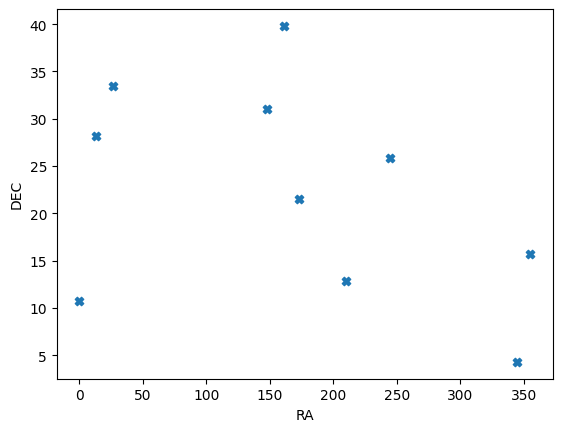

In [26]:
plt.scatter(reduced_cat['RA'],reduced_cat['DEC'],marker='X')
#plt.scatter(small_cat['RA'],small_cat['DEC'],marker='.')
plt.xlabel('RA')
plt.ylabel('DEC')

### Making a loop to check data names

In [28]:
plate_list=[]
for p,m,q in zip(reduced_cat['PLATE'],reduced_cat['MJD'],reduced_cat['FIBERID']):
    plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
plate_list=np.unique(plate_list)
plate_list
for i in range(168045):
    print("--", i + 1)
    print("Label:", plate_list[i])

-- 1
Label: 4289/spec-4289-55856-0532.fits
-- 2
Label: 4629/spec-4629-55630-0536.fits
-- 3
Label: 5006/spec-5006-55706-0452.fits
-- 4
Label: 5448/spec-5448-56013-0144.fits
-- 5
Label: 5801/spec-5801-56328-0944.fits
-- 6
Label: 6138/spec-6138-56598-0467.fits
-- 7
Label: 6182/spec-6182-56190-0718.fits
-- 8
Label: 6253/spec-6253-56574-0924.fits
-- 9
Label: 6431/spec-6431-56311-0530.fits
-- 10
Label: 6604/spec-6604-56337-0658.fits
-- 11


IndexError: index 10 is out of bounds for axis 0 with size 10

### Saving the file

In [29]:
np.savetxt('solo.txt',plate_list, fmt='%s', delimiter=',')